In [1]:
import pandas as pd
import numpy as np
import math
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.tree import DecisionTreeRegressor, DecisionTreeClassifier, plot_tree
from sklearn.metrics import r2_score, mean_squared_error, confusion_matrix, accuracy_score
from sklearn.ensemble import RandomForestClassifier, RandomForestRegressor
from xgboost import XGBRegressor

In [2]:
data_raw=pd.read_csv("./data/Train.csv")
meta=pd.read_csv("./data/airqo_metadata.csv")

In [3]:
from files.preprocessing import *

In [4]:
data = preprocessing_bl(data_raw, meta)

/Users/denniseickhorn/neuefische/ML-Project-1/files/preprocessing.py:56: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only
  data.drop(features,1,inplace=True)


In [5]:
X = data.drop('target', axis=1)
#X = data[['mean_wind_spd']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [6]:
#reg = LinearRegression()
#reg = DecisionTreeRegressor()
#reg = RandomForestRegressor(n_estimators=100)
reg = XGBRegressor()
reg.fit(X_train, y_train)
y_pred_reg = reg.predict(X_test)
mean_squared_error(y_test, y_pred_reg, squared=False)

29.606018328551745

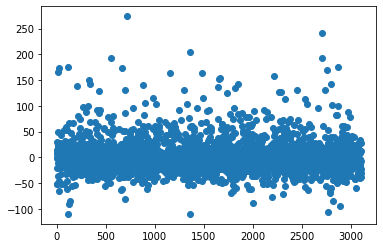

In [7]:
plt.scatter(x=range(len(y_test)),y= y_test-y_pred_reg)

In [8]:
data['target'] = (data['target']>55).astype(int)
X = data.drop('target', axis=1)
#X = data[['mean_wind_spd']]
y = data['target']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)

In [9]:
logreg = LogisticRegression()
logreg.fit(X_train, y_train)
y_pred_logreg = logreg.predict(X_test)
print(confusion_matrix(y_test, y_pred_logreg))
print(accuracy_score(y_test, y_pred_logreg))
y_pred_logreg_train = logreg.predict(X_train)
print(accuracy_score(y_train, y_pred_logreg_train))

[[1782  181]
 [ 863  282]]
0.6640926640926641
0.659721663582978


/Users/denniseickhorn/neuefische/ML-Project-1/.venv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [10]:
treeC = DecisionTreeClassifier()
treeC.fit(X_train, y_train)
y_pred_treeC = treeC.predict(X_test)
print(confusion_matrix(y_test, y_pred_treeC))
print(accuracy_score(y_test, y_pred_treeC))
y_pred_treeC_train = treeC.predict(X_train)
print(accuracy_score(y_train, y_pred_treeC_train))

[[1640  323]
 [ 297  848]]
0.8005148005148005
0.9917142627302711


In [11]:
sorted(np.array([X_train.columns, treeC.feature_importances_]).T, key= lambda t: t[1])

[array(['min_precip', 0.0], dtype=object),
 array(['median_precip', 0.0], dtype=object),
 array(['loc_altitude', 0.0], dtype=object),
 array(['km2', 0.0], dtype=object),
 array(['aspect', 0.0], dtype=object),
 array(['dist_trunk', 0.0], dtype=object),
 array(['dist_primary', 0.0], dtype=object),
 array(['dist_tertiary', 0.0], dtype=object),
 array(['dist_unclassified', 0.0], dtype=object),
 array(['dist_residential', 0.0], dtype=object),
 array(['popn', 0.0], dtype=object),
 array(['hh', 0.0], dtype=object),
 array(['hh_cook_charcoal', 0.0], dtype=object),
 array(['hh_cook_firewood', 0.0], dtype=object),
 array(['hh_burn_waste', 0.0], dtype=object),
 array(['ptp_precip', 0.0002789687483610421], dtype=object),
 array(['max_precip', 0.0004237290108351891], dtype=object),
 array(['min_atmos_press', 0.0018382848464847908], dtype=object),
 array(['max_wind_spd', 0.0019101443780883583], dtype=object),
 array(['min_rel_humidity', 0.0031993730400485185], dtype=object),
 array(['max_wind_dir', 

In [12]:
param_grid = {'criterion': ['gini', 'entropy'],
                'max_depth': [None] + list(np.linspace(2,30,2).astype(int)),
                'min_samples_split': np.linspace(2,82,10).astype(int),
                'min_samples_leaf': np.linspace(2,82,10).astype(int)
}

gs = GridSearchCV(RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, scoring='accuracy')
#gs.fit(X_train, y_train)

In [13]:
#RanFor = gs.best_estimator_
RanFor = RandomForestClassifier(criterion = 'entropy', max_depth=30, random_state=42)
RanFor.fit(X_train, y_train)
y_pred_RanFor = RanFor.predict(X_test)
print(confusion_matrix(y_test, y_pred_RanFor))
print(accuracy_score(y_test, y_pred_RanFor))
y_pred_RanFor_train = RanFor.predict(X_train)
print(accuracy_score(y_train, y_pred_RanFor_train))

[[1713  250]
 [ 296  849]]
0.8243243243243243
0.9917142627302711
